# Programming Exercise 2: Logistic Regression
# 1 Logistic Regression
## 1.1 Visualizing the data

In [1]:
import csv

xs = []
ys = []
with open('../matlab/ex2data1.txt') as f:
    csv_reader = csv.reader(f)
    for row in csv_reader:
        assert len(row) == 3
        xs.append(map(float, row[:-1]))
        ys.append(int(row[-1]))

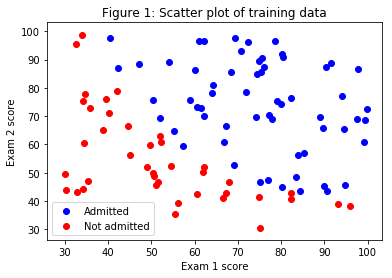

In [2]:
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

X = np.array(xs)
y = np.array(ys)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='b', label='Admitted')
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='r', label='Not admitted')
plt.title('Figure 1: Scatter plot of training data')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()

## 1.2 Implementation
### 1.2.1 Warmup exercise: sigmoid function
$h_\theta(x) = g(\theta^T x)$

$g(z) = 1 / (1 + e^{-z})$

In [3]:
def sigmoid(z):
    ### YOUR CODE HERE ###


    ######################

print sigmoid(0)
print sigmoid(np.array([-1, 0, 1]))

0.5
[ 0.26894142  0.5         0.73105858]


### 1.2.2 Cost function and gradient
$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)} \log h_\theta(x^{(i)}) - (1 - y^{(i)}) \log (1 - h_\theta(x^{(i)})) ]$

$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}$

In [4]:
def cost_function(theta, X, y):
    m, _ = X.shape
    J = 0
    grad = np.zeros(theta.shape)
    h = sigmoid(np.dot(X, theta))
    ### YOUR CODE HERE ###



    ######################
    return J, grad

In [5]:
m = len(ys)
X = np.column_stack((np.ones((m, 1)), np.array(xs)))
_, n = X.shape
y = np.array([ys]).T
theta = np.zeros((n, 1))

J, grad = cost_function(theta, X, y)
print J
print grad

0.69314718056
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


### 1.2.3 Learning parameters using fminunc
cf. https://docs.scipy.org/doc/scipy-0.10.0/reference/tutorial/optimize.html

In [6]:
from scipy.optimize import fmin_bfgs  # It seems fmin_bfgs does not accept column vectors.

### Note that this is inefficient! ###
def cost(theta):
    J, grad = cost_function(np.array([theta]).T, X, y)
    return J

def gradient(theta):
    J, grad = cost_function(np.array([theta]).T, X, y)
    return grad.T[0]

theta = fmin_bfgs(cost, np.zeros(n), fprime=gradient)
theta = np.array([theta]).T
print theta

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31
[[-25.16133284]
 [  0.2062317 ]
 [  0.2014716 ]]


/Users/nakano/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


### 1.2.4 Evaluating logistic regression

In [7]:
def predict(theta, X):
    ### YOUR CODE HERE ###


    ######################

# For a student with an Exam 1 score of 45 and an Exam 2 score of 85,
# you should expect to see an admission probability of 0.776.
student = np.array([1, 45, 85])
print predict(theta, student)

[ 0.77629072]


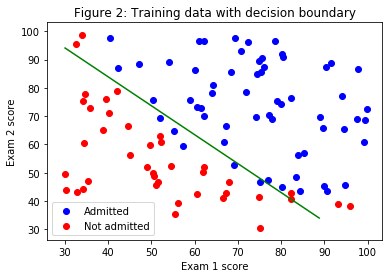

In [8]:
X = np.array(xs)
y = np.array(ys)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='b', label='Admitted')
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='r', label='Not admitted')
plt.title('Figure 2: Training data with decision boundary')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()

# theta_0 + theta_1 x + theta_2 y = 0 defines a line of 50% probability
xmin, ymin = np.min(X, axis=0)
xmax, ymax = np.max(X, axis=0)
xs_ = np.linspace(xmin, xmax, 20)
ys_ = - (theta[0] + theta[1] * xs_) / theta[2]
indices = [i for i, (x, y) in enumerate(zip(xs_, ys_)) if xmin <= x <= xmax and ymin <= y <= ymax]
plt.plot(xs_[indices], ys_[indices], 'g')